# Face detection guide for Python

The MediaPipe Face Detector task lets you detect faces in an image or video. You can use this task to locate faces and facial features within a frame. This task uses a machine learning (ML) model that works with single images or a continuous stream of images. The task outputs face locations, along with the following facial key points: left eye, right eye, nose tip, mouth, left eye tragion, and right eye tragion.

## Task details

This section describes the capabilities, inputs, outputs, and configuration options of this task.

### Features

* Input image processing - Processing includes image rotation, resizing, normalization, and color space conversion.
* Score threshold - Filter results based on prediction scores.

| Task inputs | Task outputs |
| :--- | :--- |
| The Face Detector accepts an input of one of the following data types:<br>- Still images<br>- Decoded video frames<br>- Live video feed | The Face Detector outputs the following results:<br>- Bounding boxes for detected faces in an image frame.<br>- Coordinates for 6 face landmarks for each detected face. |

### Configuratiom options

| Option Name | Description | Value Range | Default Value |
| :--- | :--- | :--- | :--- |
| `running_mode` | Sets the running mode for the task. There are three modes:<br><br>**IMAGE**: The mode for single image inputs.<br><br>**VIDEO**: The mode for decoded frames of a video.<br><br>**LIVE_STREAM**: The mode for a livestream of input data, such as from a camera. In this mode, resultListener must be called to set up a listener to receive results asynchronously. | `{IMAGE, VIDEO, LIVE_STREAM}` | `IMAGE` |
|`min_detection_confidence`|The minimum confidence score for the face detection to be considered successful.|`Float [0,1]`|`0.5`|
|`min_suppression_threshold`|The minimum non-maximum-suppression threshold for face detection to be considered overlapped.|`Float [0,1]`|`0.3`|
|`result_callback`|Sets the result listener to receive the detection results asynchronously when the Face Detector is in the live stream mode. Can only be used when running mode is set to ``LIVE_STREAM``.|`N/A`|`Not set`|

## Models

Face detection models can vary depending on their intended use cases, such as short-range and long-range detection. Models also typically make trade-offs between performance, accuracy, resolution, and resource requirements, and in some cases, include additional features.

The models listed in this section are variants of BlazeFace, a lightweight and accurate face detector optimized for mobile GPU inference. BlazeFace models are suitable for applications like 3D facial keypoint estimation, expression classification, and face region segmentation. BlazeFace uses a lightweight feature extraction network similar to [MobileNetV1/V2](https://arxiv.org/abs/1704.04861).

### BlazeFace (short-range)

A lightweight model for detecting single or multiple faces within selfie-like images from a smartphone camera or webcam. The model is optimized for front-facing phone camera images at short range. The model architecture uses a Single Shot Detector (SSD) convolutional network technique with a custom encoder. For more information, see the research paper on [Single Shot MultiBox Detector](https://arxiv.org/abs/1512.02325).

| Model name | Input shape | Quantization type | Model car | Versions |
| :--- | :--- | :--- | :--- | :--- |
| [BlazeFace (short-range)](https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/latest/blaze_face_short_range.tflite) | 128x128 | float 16 | [info](https://storage.googleapis.com/mediapipe-assets/MediaPipe%20BlazeFace%20Model%20Card%20(Short%20Range).pdf) | [Latest](https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/latest/blaze_face_short_range.tflite) |

### BlazeFace (full-range)

A relatively lightweight model for detecting single or multiple faces within images from a smartphone camera or webcam. The model is optimized for full-range images, like those taken with a back-facing phone camera images. The model architecture uses a technique similar to a [CenterNet](https://arxiv.org/abs/1904.08189) convolutional network with a custom encoder.

| Model name | Input shape | Quantization type | Model car | Versions |
| :--- | :--- | :--- | :--- | :--- |
| BlazeFace (full-range) | 128x128 | float 16 | info | Coming soon |

### BlazeFace Sparse (full-range)

A lighter version of the regular full-range BlazeFace model, roughly 60% smaller in size. The model is optimized for full-range images, like those taken with a back-facing phone camera images. The model architecture uses a technique similar to a [CenterNet](https://arxiv.org/abs/1904.08189) convolutional network with a custom encoder.

| Model name | Input shape | Quantization type | Model car | Versions |
| :--- | :--- | :--- | :--- | :--- |
| BlazeFace Sparse (full-range) | 128x128 | float 16 | info | Coming soon |

## Test benchmarks

Here's the task benchmarks for the whole pipeline based on the above pre-trained models. The latency result is the average latency on Pixel 6 using CPU / GPU.

| Model Name | CPU Latency | GPU Latency |
| :--- | :--- | :--- |
| BlazeFace (short-range) | 2.94 ms | 7.41 ms |

## Preparation

Let's start with installing MediaPipe.

In [ ]:
# pip install mediapipe

  Using cached absl_py-2.4.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.2 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/10.2 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/10.2 MB 2.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/10.2 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/10.2 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/10.2 MB 1.0 MB/s eta 0:00:09
   ------ --------------------------------- 1.6/10.2 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 1.8/10.2 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/10.2 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/10.2 MB 1.1 MB/s eta 0:00:08
   -------- --------------


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Then download an off-the-shelf model. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_detector#models) for more face detection models that you can use.

In [6]:
!curl -o detector.tflite https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/1/blaze_face_short_range.tflite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  224k  100  224k    0     0   577k      0 --:--:-- --:--:-- --:--:--  578k


## Visualization utilities

To better demonstrate the Face Detector API, we have created a set of visualization tools that will be used in this colab. These will draw a bounding box around detected faces, as well as markers over certain detected points on the faces.

In [1]:
from typing import Tuple, Union
import math
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def _normalized_to_pixel_coordinates(
    normalized_x: float, normalized_y: float, image_width: int,
    image_height: int) -> Union[None, Tuple[int, int]]:
  """Converts normalized value pair to pixel coordinates."""

  # Checks if the float value is between 0 and 1.
  def is_valid_normalized_value(value: float) -> bool:
    return (value > 0 or math.isclose(0, value)) and (value < 1 or
                                                      math.isclose(1, value))

  if not (is_valid_normalized_value(normalized_x) and
          is_valid_normalized_value(normalized_y)):
    # TODO: Draw coordinates even if it's outside of the image bounds.
    return None
  x_px = min(math.floor(normalized_x * image_width), image_width - 1)
  y_px = min(math.floor(normalized_y * image_height), image_height - 1)
  return x_px, y_px


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes and keypoints on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  annotated_image = image.copy()
  height, width, _ = image.shape

  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(annotated_image, start_point, end_point, TEXT_COLOR, 3)

    # Draw keypoints
    for keypoint in detection.keypoints:
      keypoint_px = _normalized_to_pixel_coordinates(keypoint.x, keypoint.y,
                                                     width, height)
      color, thickness, radius = (0, 255, 0), 2, 2
      cv2.circle(annotated_image, keypoint_px, thickness, color, radius)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    category_name = '' if category_name is None else category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(annotated_image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return annotated_image

## Download test image

To demonstrate Face Detection, you can download a sample image using the following code. Credits: https://pixabay.com/photos/brother-sister-girl-family-boy-977170/

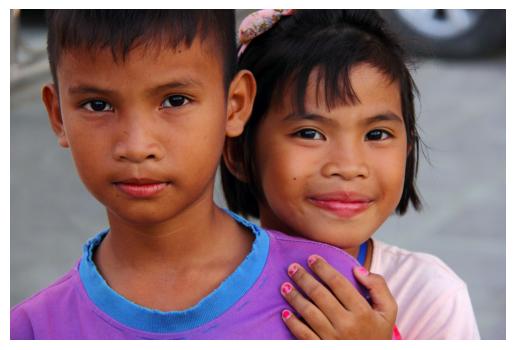

In [3]:
# !curl https://i.imgur.com/Vu2Nqwb.jpeg -s -o image.jpg

IMAGE_FILE = 'image.jpg'

import cv2
import matplotlib.pyplot as plt


# Resmi oku
img = cv2.imread('image.jpg')
# OpenCV resimleri BGR formatında okur, Matplotlib ise RGB bekler.
# Renklerin doğru görünmesi için dönüştürme yapmalıyız:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Satır içi gösterim
plt.imshow(img_rgb)
plt.axis('off') # Eksenleri gizler
plt.show()

## Running inference and visualizing the results

The final step is to run face detection on your selected image. This involves creating your FaceDetector object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

You can check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_detector/python) to learn more about configuration options that this solution supports.

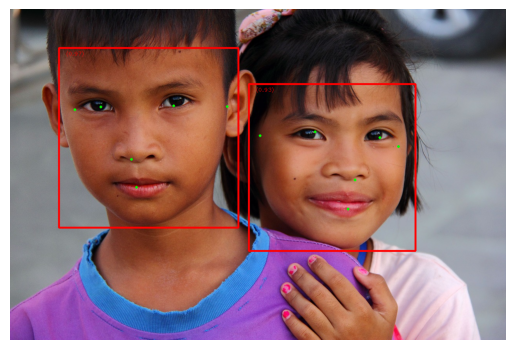

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=126, origin_y=100, width=463, height=463), categories=[Category(index=0, score=0.9729152917861938, display_name=None, category_name=None)], keypoints=[NormalizedKeypoint(x=0.18298378586769104, y=0.2961040139198303, label=None, score=0.0), NormalizedKeypoint(x=0.3302789032459259, y=0.29289937019348145, label=None, score=0.0), NormalizedKeypoint(x=0.245155930519104, y=0.45445096492767334, label=None, score=0.0), NormalizedKeypoint(x=0.2551001310348511, y=0.5381497740745544, label=None, score=0.0), NormalizedKeypoint(x=0.1305208057165146, y=0.30425864458084106, label=None, score=0.0), NormalizedKeypoint(x=0.4381846785545349, y=0.2945232391357422, label=None, score=0.0)]), Detection(bounding_box=BoundingBox(origin_x=616, origin_y=193, width=430, height=430), categories=[Category(index=0, score=0.9251380562782288, display_name=None, category_name=None)], keypoints=[NormalizedKeypoint(x=0.6151331663131714, y=0.3713382482

In [6]:
# STEP 1: Import the necessary modules.
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
import cv2

# STEP 2: Create an FaceDetector object.
base_options = python.BaseOptions(model_asset_path='detector.tflite')
options = vision.FaceDetectorOptions(base_options=base_options)
detector = vision.FaceDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect faces in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
# MediaPipe zaten RGB döndürdüğü için cv2.cvtColor yapmanıza gerek yok.
# Direkt görselleştirebiliriz:
plt.imshow(annotated_image)
plt.axis('off') # Koordinat eksenlerini gizler
plt.show()

print(detection_result)